In [1]:
import pandas as pd
data=pd.read_csv('kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [2]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

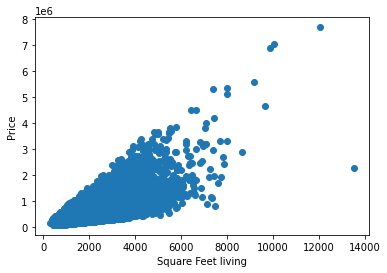

In [3]:
import  matplotlib.pyplot as plt
plt.scatter(data["sqft_living"],data["price"])
plt.xlabel("Square Feet living")
plt.ylabel("Price")
plt.show()

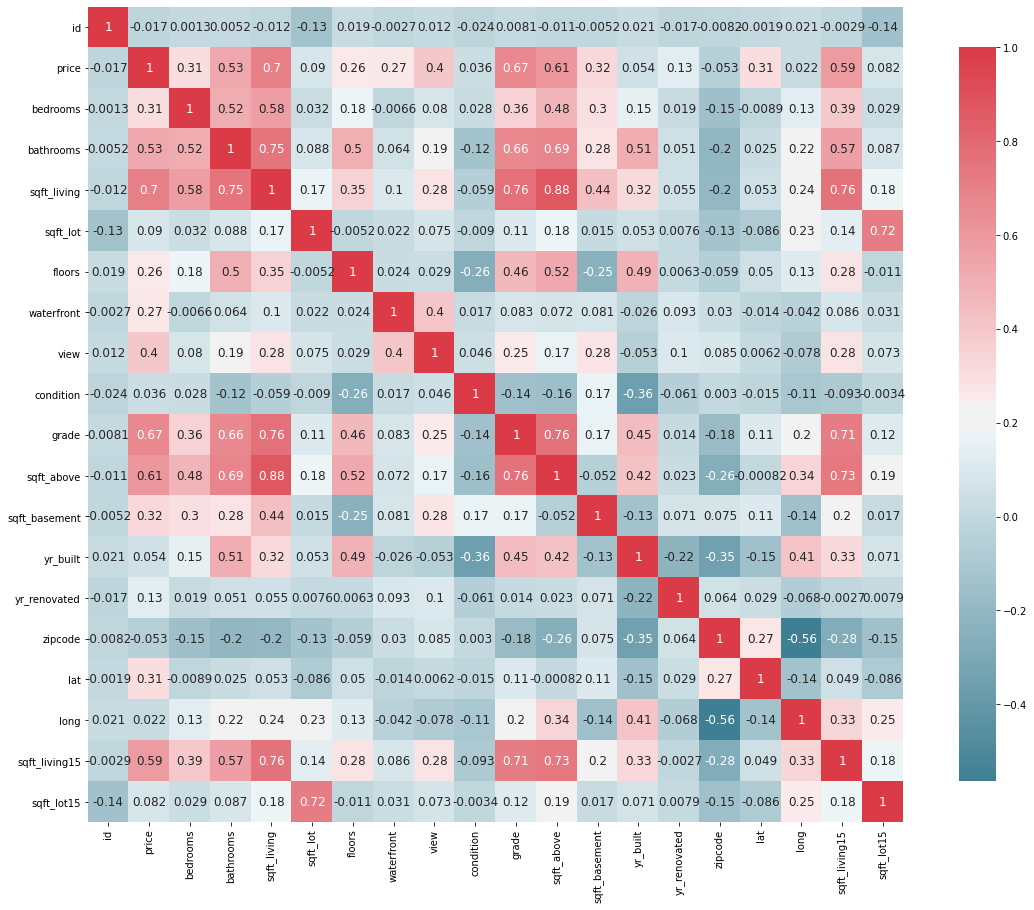

In [4]:
import seaborn as sns
def plot_correlation_map( data ):

    corr = data.corr()

    s , ax = plt.subplots( figsize =( 20 , 15 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )
plot_correlation_map( data )
#

In [5]:
#according to our correlation function we can deduce that since this is a "houses on sale" dataset, the price is the most important
#feature as well as the features that scale well in the correlation data(closer to 1) excluding the id. 
#The most important features are: price, sqft_living, bedrooms, bathrooms, grade, sqft_above, sqft_living15.

In [8]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics

x=data["sqft_living"].values[:,np.newaxis]
y=data["price"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40)
model=LinearRegression() 
model.fit(x_train,y_train) 
predicted=model.predict(x_test)
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 62902408306.86502
R squared 0.4996528488387417


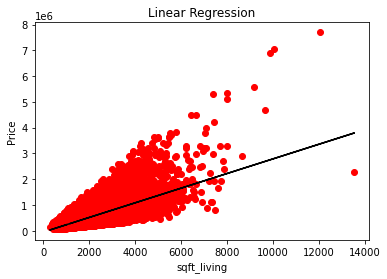

In [9]:
plt.scatter(x,y,color="r")
plt.title("Linear Regression")
plt.ylabel("Price")
plt.xlabel("sqft_living")
plt.plot(x,model.predict(x),color="k")
plt.show()

In [10]:
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 62902408306.86502
R squared 0.4996528488387417


In [17]:
x=data[["sqft_living","sqft_above","bedrooms"]]
y=data["price"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40)
model=LinearRegression() 
model.fit(x_train,y_train) 
predicted=model.predict(x_test)
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 62380778954.12089
R squared 0.5038020661363429


In [ ]:
#MSE for the multi-linear regression is smaller than the linear regression MSE
#R squared for the multi-linear regression is closer to 1
#Multi-linear regression is more precise which means it's a better model than linear regression

In [23]:
from sklearn.preprocessing import PolynomialFeatures 

x= data[["sqft_living", "sqft_above"]]
y= data["price"].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=40) 
lg=LinearRegression()
poly=PolynomialFeatures(degree=3)

x_train_fit = poly.fit_transform(x_train)
lg.fit(x_train_fit, y_train)
x_test_ = poly.fit_transform(x_test)
predicted = lg.predict(x_test_)

print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))

MSE:  57232313777.723
R squared:  0.5447547093371674


In [ ]:
#MSE for polynomial regression is smaller and R squared is closer to 1 which means polynomial regression is a more precise than multi_linear
#and linear regression as long as we don't start overfitting